The real motive for this project is to find the **RISK OF ASTHMA** using the parameters **PM 2.5, PM 10, Temperature, Humidity and PEFR values**.

In this Project, The risk of asthma is considered using the percentage of the PEFR(Peak expiratory flow rate)
*The PEFR results are classified into three categories such as
* ‘Green’ (Safe)
* ‘Yellow’ (Moderate Risk)
* ‘Red’ (High Risk)


For Detailed Explanation:
1. https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health
2. https://www.mdapp.co/peak-flow-calculator-76/

This project is an actual implementation of the following [**Research Paper**](https://drive.google.com/file/d/1TnftXbxjAuIEi3i59bGnsFcqKhfQrfIy/view?usp=sharing) written by **Professor Sungchul Seo**


#Dataset

* This [**Website**](https://app.cpcbccr.com/AQI_India/) helped me to stack up the real time Data of the Particulate Matter in my particular location.

* We used [**Weather API**](https://openweathermap.org/api) to get the Temperature and Humidity values of the desired Location.

## Algo

* For this Project, I used **ANN, DNN, FCN and CNN** to get the best outcome.

#Load and Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
PEFR_df = pd.read_csv('/content/Air Pollutants Dataset - Sheet1.csv')

In [ ]:
PEFR_df.head(5)

,State,City,Place,Date,Average PM2.5,Average PM10,PEFR
0,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,1/1/2022,130.0,36.0,312
1,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,1/2/2022,157.0,48.0,300
2,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,1/3/2022,213.0,61.0,250
3,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,1/4/2022,232.0,81.0,244
4,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,1/5/2022,252.0,162.0,230


In [ ]:
PEFR_df['Date']=pd.to_datetime(PEFR_df['Date'])

In [ ]:
PEFR_df.describe()

,Average PM2.5,Average PM10,PEFR
count,501.000000,501.000000,501.000000
mean,94.683633,101.540918,299.195609
std,57.085683,48.495039,36.338928
min,9.000000,9.000000,202.000000
25%,51.000000,64.000000,273.000000
50%,80.000000,100.000000,299.000000
75%,132.000000,128.000000,325.000000
max,287.000000,349.000000,389.000000


In [ ]:
PEFR_df.describe()

,Average PM2.5,Average PM10,PEFR
count,501.000000,501.000000,501.000000
mean,94.683633,101.540918,299.195609
std,57.085683,48.495039,36.338928
min,9.000000,9.000000,202.000000
25%,51.000000,64.000000,273.000000
50%,80.000000,100.000000,299.000000
75%,132.000000,128.000000,325.000000
max,287.000000,349.000000,389.000000


In [ ]:
Temp_df = pd.read_csv('/content/Temp.csv')

In [ ]:
Temp_df.head()

,Date,Temp,RH
0,2021-01-01,22.28,36.12
1,2021-01-02,25.84,34.94
2,2021-01-03,26.34,43.69
3,2021-01-04,27.99,35.50
4,2021-01-05,28.15,30.62


In [ ]:
Temp_df['Date']=pd.to_datetime(Temp_df['Date'])

In [ ]:
merged_df = pd.merge(PEFR_df, Temp_df, on='Date',how='left')
merged_df

,State,City,Place,Date,Average PM2.5,Average PM10,PEFR,Temp,RH
0,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2022-01-01,130.0,36.0,312,18.11,56.38
1,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2022-01-02,157.0,48.0,300,16.85,56.81
2,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2022-01-03,213.0,61.0,250,14.34,69.56
3,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2022-01-04,232.0,81.0,244,18.47,62.12
4,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2022-01-05,252.0,162.0,230,18.99,51.88
...,...,...,...,...,...,...,...,...,...
496,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2023-05-12,99.0,94.0,301,40.49,10.88
497,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2023-05-13,65.0,75.0,312,41.47,10.69
498,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2023-05-14,78.0,86.0,300,43.76,10.19
499,Uttar Pradesh,Lucknow,Gomti Nagar-UPPCB,2023-05-15,125.0,108.0,293,42.40,13.31


In [ ]:
merged_df.describe()

,Average PM2.5,Average PM10,PEFR,Temp,RH
count,501.000000,501.000000,501.000000,501.000000,501.000000
mean,94.683633,101.540918,299.195609,30.818323,39.932475
std,57.085683,48.495039,36.338928,8.059051,22.040924
min,9.000000,9.000000,202.000000,14.010000,6.440000
25%,51.000000,64.000000,273.000000,23.950000,19.810000
50%,80.000000,100.000000,299.000000,31.080000,39.620000
75%,132.000000,128.000000,325.000000,37.870000,59.000000
max,287.000000,349.000000,389.000000,45.620000,93.560000


#Data Visulization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          501 non-null    object        
 1   City           501 non-null    object        
 2   Place          501 non-null    object        
 3   Date           501 non-null    datetime64[ns]
 4   Average PM2.5  501 non-null    float64       
 5   Average PM10   501 non-null    float64       
 6   PEFR           501 non-null    int64         
 7   Temp           501 non-null    float64       
 8   RH             501 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 39.1+ KB


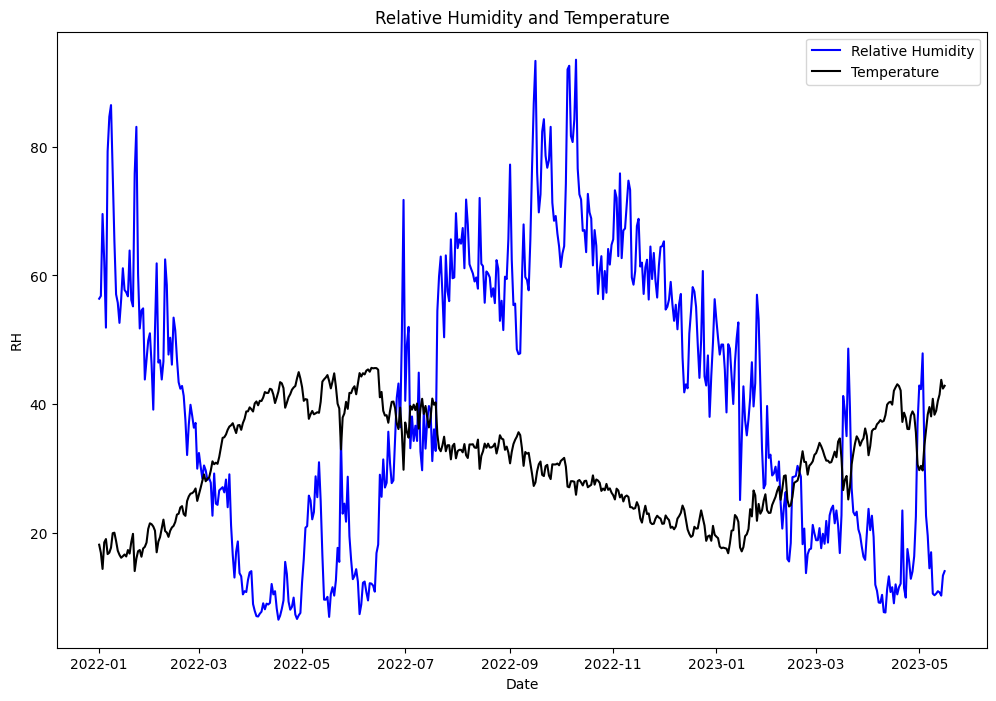

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x='Date', y='RH', data=merged_df, ax=ax, color='blue', label='Relative Humidity')
sns.lineplot(x='Date', y='Temp', data=merged_df, ax=ax, color='black', label='Temperature')
ax.set_title('Relative Humidity and Temperature')
ax.legend()
plt.show()

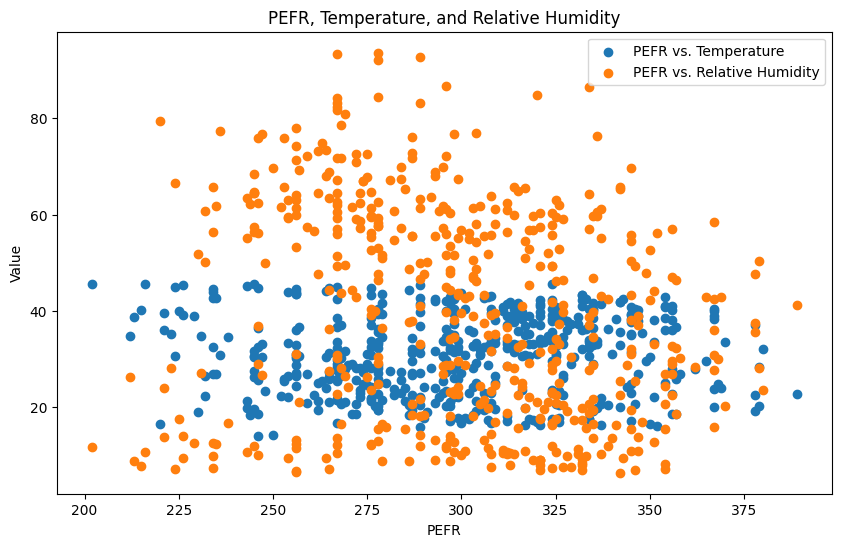

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(merged_df['PEFR'], merged_df['Temp'], label='PEFR vs. Temperature')
ax.scatter(merged_df['PEFR'], merged_df['RH'], label='PEFR vs. Relative Humidity')
ax.set_xlabel('PEFR')
ax.set_ylabel('Value')
ax.set_title('PEFR, Temperature, and Relative Humidity')
ax.legend()
plt.show()

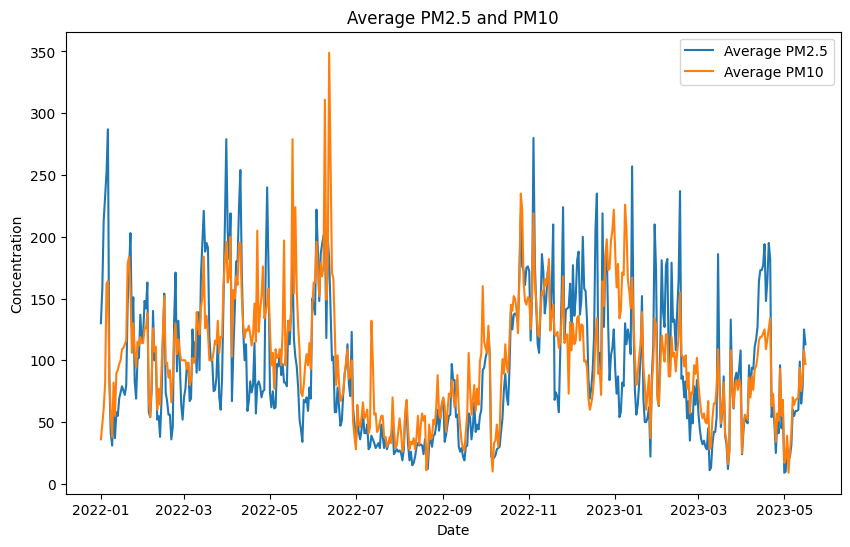

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(merged_df['Date'], merged_df['Average PM2.5'], label='Average PM2.5')
ax.plot(merged_df['Date'], merged_df['Average PM10'], label='Average PM10')
ax.set_xlabel('Date')
ax.set_ylabel('Concentration')
ax.set_title('Average PM2.5 and PM10')
ax.legend()
plt.show()

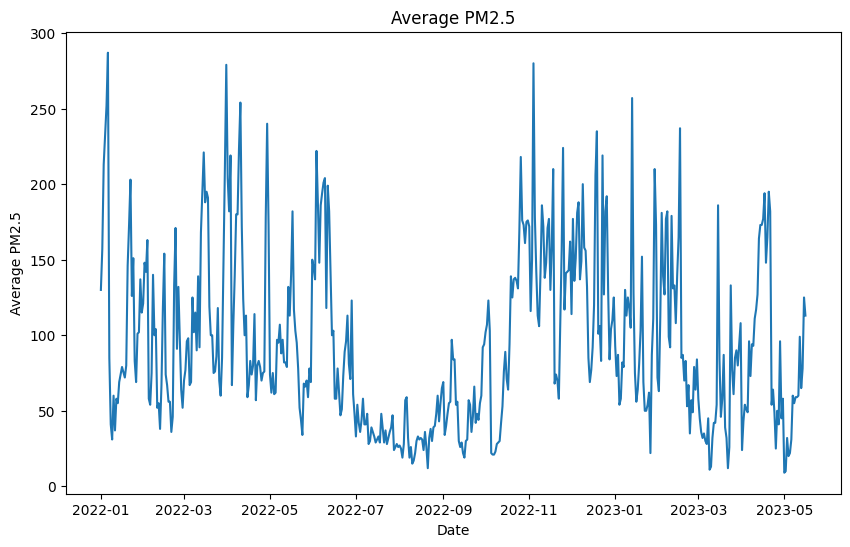

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Date', y='Average PM2.5', data=merged_df, ax=ax)
ax.set_title('Average PM2.5')
plt.show()

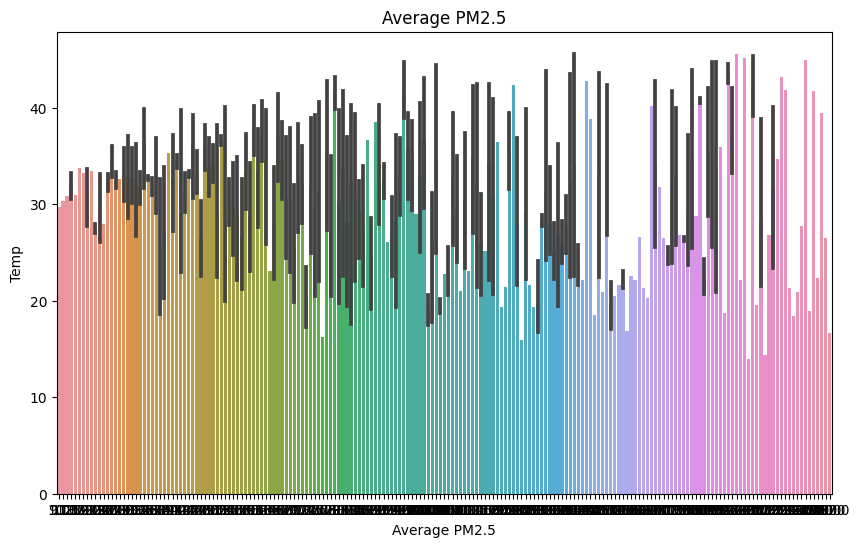

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Average PM2.5', y='Temp', data=merged_df, ax=ax)
ax.set_title('Average PM2.5')
plt.show()

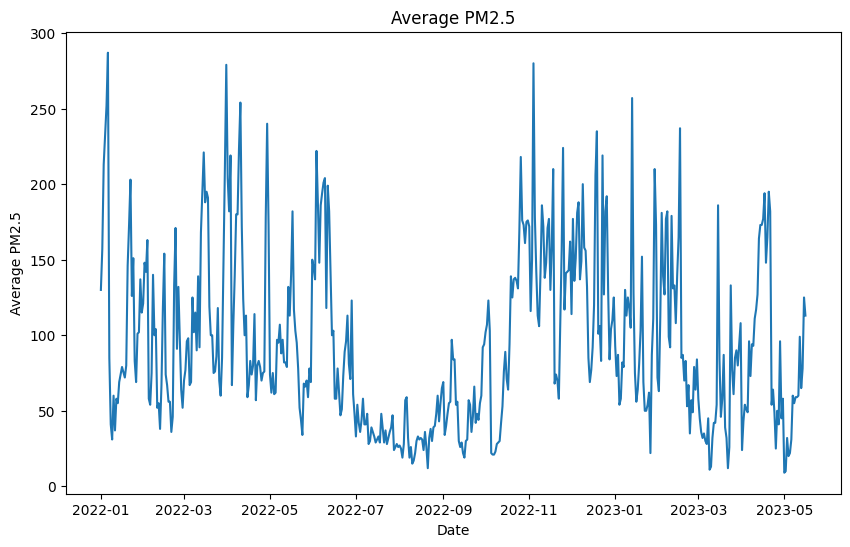

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Date', y='Average PM2.5', data=merged_df, ax=ax)
ax.set_title('Average PM2.5')
plt.show()

<ipython-input-20-3b5c59d10e2b>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = new_df.groupby(['Year', 'Month']).mean()[['Average PM2.5', 'Average PM10']]


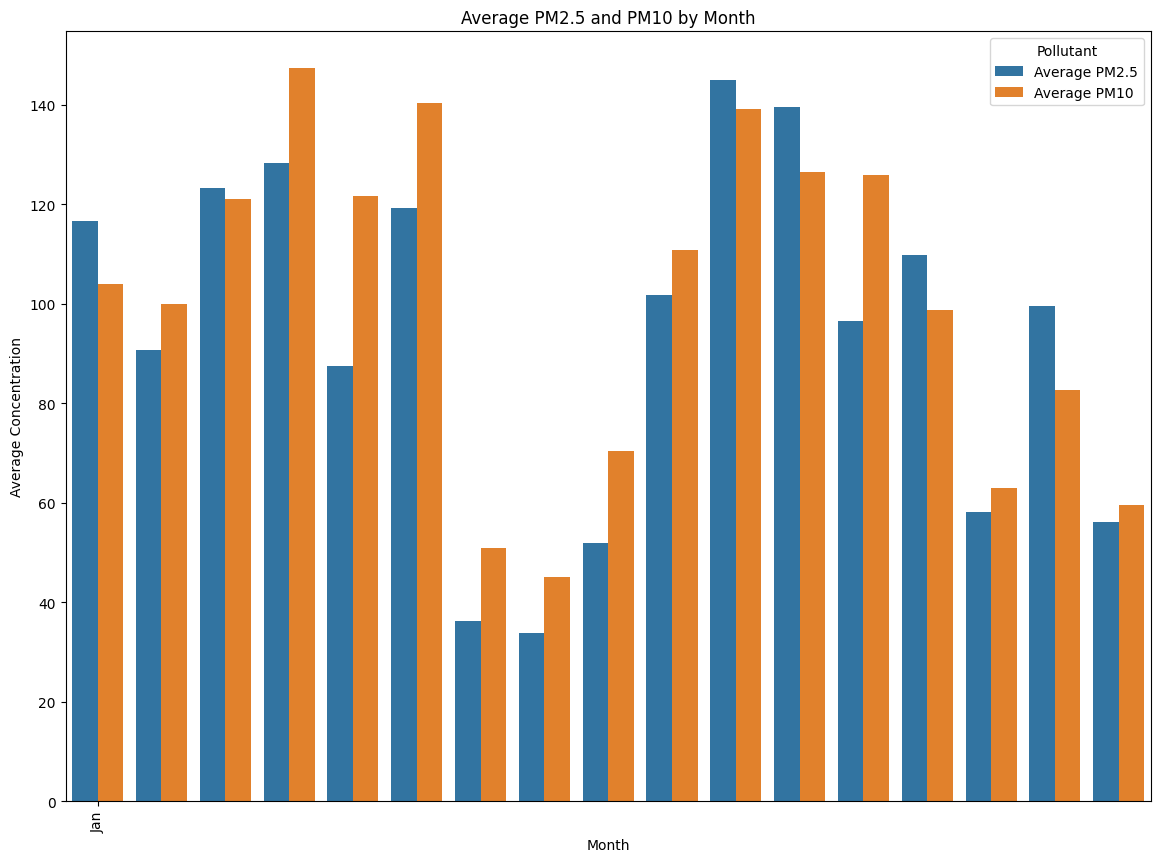

In [ ]:
import datetime
import matplotlib.dates as mdates

new_df = merged_df.copy()
new_df['Month'] = merged_df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%m'))
new_df['Year'] = merged_df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y'))

# Calculate average values of PM2.5 and PM10 for each month
monthly_avg = new_df.groupby(['Year', 'Month']).mean()[['Average PM2.5', 'Average PM10']]
monthly_avg = monthly_avg.reset_index()

# Combine Year and Month columns into a single date column
monthly_avg['Date'] = monthly_avg.apply(lambda x: datetime.datetime.strptime(x['Year'] + '-' + x['Month'], '%Y-%m'), axis=1)

# Reshape the dataframe to have separate columns for PM2.5 and PM10 values
monthly_avg = monthly_avg.melt(id_vars=['Year', 'Month', 'Date'], value_vars=['Average PM2.5', 'Average PM10'], var_name='Pollutant', value_name='Average Concentration')

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x='Date', y='Average Concentration', hue='Pollutant', data=monthly_avg, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Average Concentration')
ax.set_title('Average PM2.5 and PM10 by Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=90)
plt.legend(title='Pollutant')
plt.show()


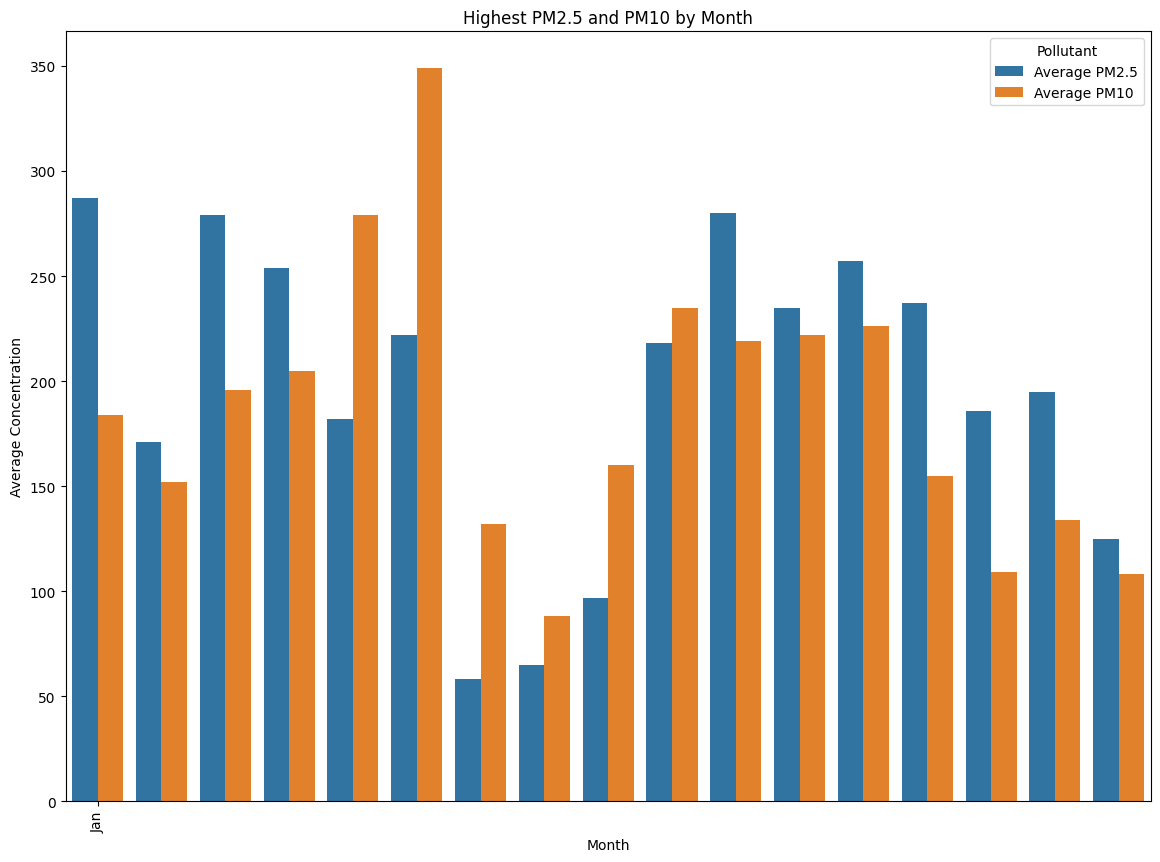

In [ ]:
import datetime
import matplotlib.dates as mdates

new_df = merged_df.copy()
new_df['Month'] = merged_df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%m'))
new_df['Year'] = merged_df['Date'].apply(lambda x: datetime.datetime.strftime(x, '%Y'))

# Calculate average values of PM2.5 and PM10 for each month
monthly_avg = new_df.groupby(['Year', 'Month']).max()[['Average PM2.5', 'Average PM10']]
monthly_avg = monthly_avg.reset_index()

# Combine Year and Month columns into a single date column
monthly_avg['Date'] = monthly_avg.apply(lambda x: datetime.datetime.strptime(x['Year'] + '-' + x['Month'], '%Y-%m'), axis=1)

# Reshape the dataframe to have separate columns for PM2.5 and PM10 values
monthly_avg = monthly_avg.melt(id_vars=['Year', 'Month', 'Date'], value_vars=['Average PM2.5', 'Average PM10'], var_name='Pollutant', value_name='Average Concentration')

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(14, 10))
sns.barplot(x='Date', y='Average Concentration', hue='Pollutant', data=monthly_avg, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Average Concentration')
ax.set_title('Highest PM2.5 and PM10 by Month')
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=90)
plt.legend(title='Pollutant')
plt.show()


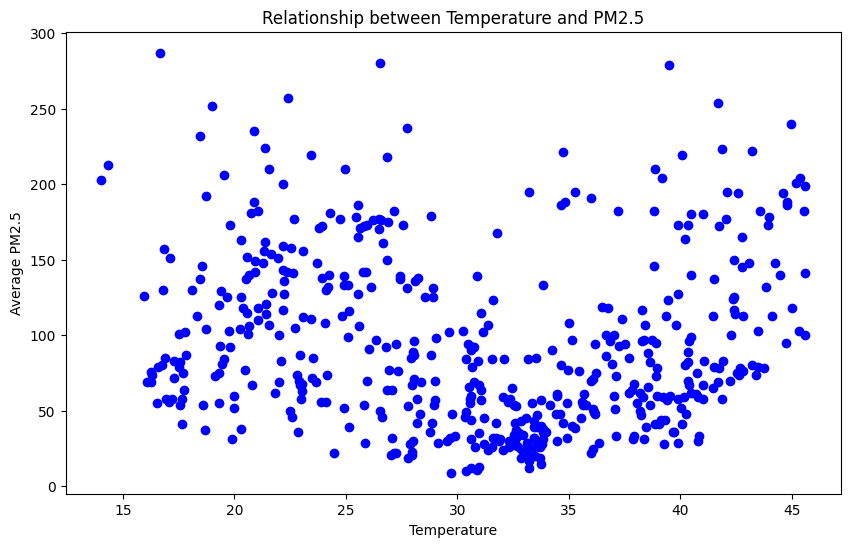

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(merged_df['Temp'], merged_df['Average PM2.5'], color='blue')
ax.set_xlabel('Temperature')
ax.set_ylabel('Average PM2.5')
ax.set_title('Relationship between Temperature and PM2.5')

plt.show()


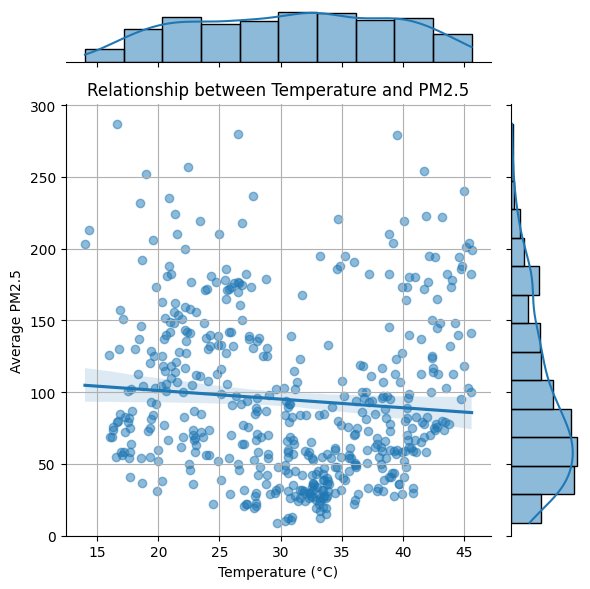

In [ ]:
sns.jointplot(x='Temp', y='Average PM2.5', data=merged_df, kind='reg', scatter_kws={'alpha': 0.5})
plt.xlabel('Temperature (°C)')
plt.ylabel('Average PM2.5')
plt.title('Relationship between Temperature and PM2.5')
plt.ylim(0, None)  # Set the y-axis limit to start from 0
plt.grid(True)  # Add grid lines
plt.tight_layout()
plt.show()


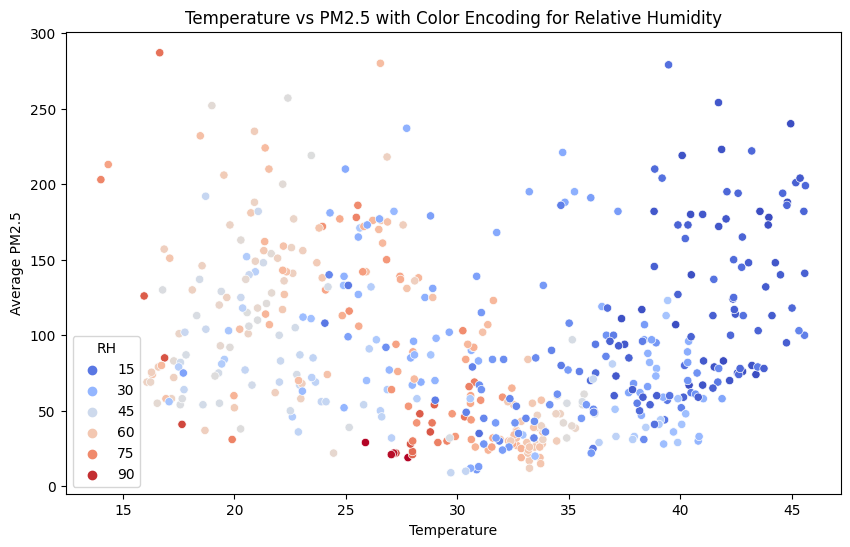

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp', y='Average PM2.5', data=merged_df, hue='RH', palette='coolwarm')

plt.xlabel('Temperature')
plt.ylabel('Average PM2.5')
plt.title('Temperature vs PM2.5 with Color Encoding for Relative Humidity')
plt.show()

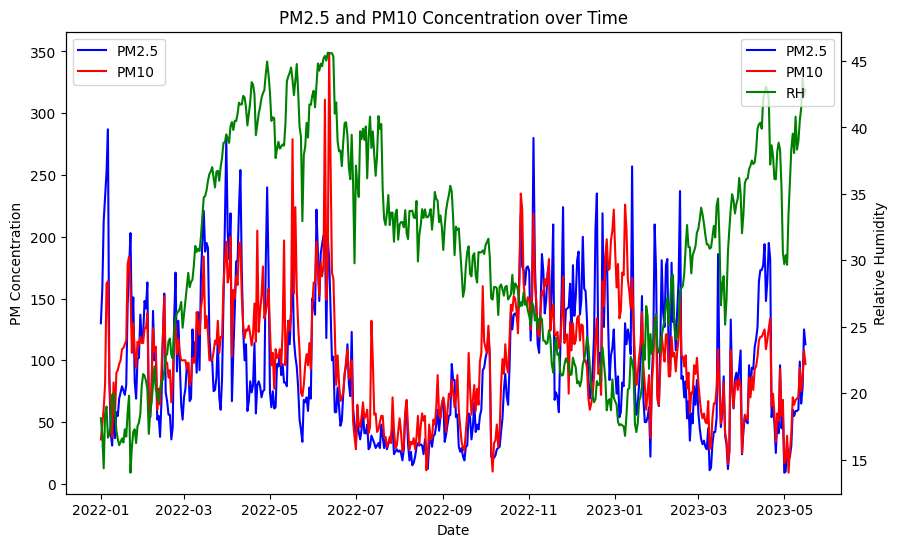

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PM2.5 and PM10
ax1.plot(merged_df['Date'], merged_df['Average PM2.5'], color='blue', label='PM2.5')
ax1.plot(merged_df['Date'], merged_df['Average PM10'], color='red', label='PM10')
ax1.set_xlabel('Date')
ax1.set_ylabel('PM Concentration')
ax1.set_title('PM2.5 and PM10 Concentration over Time')
ax1.legend(loc='upper left')

# Create a secondary y-axis for RH
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Temp'], color='green', label='RH')
ax2.set_ylabel('Relative Humidity')

# Display legend for RH
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.show()

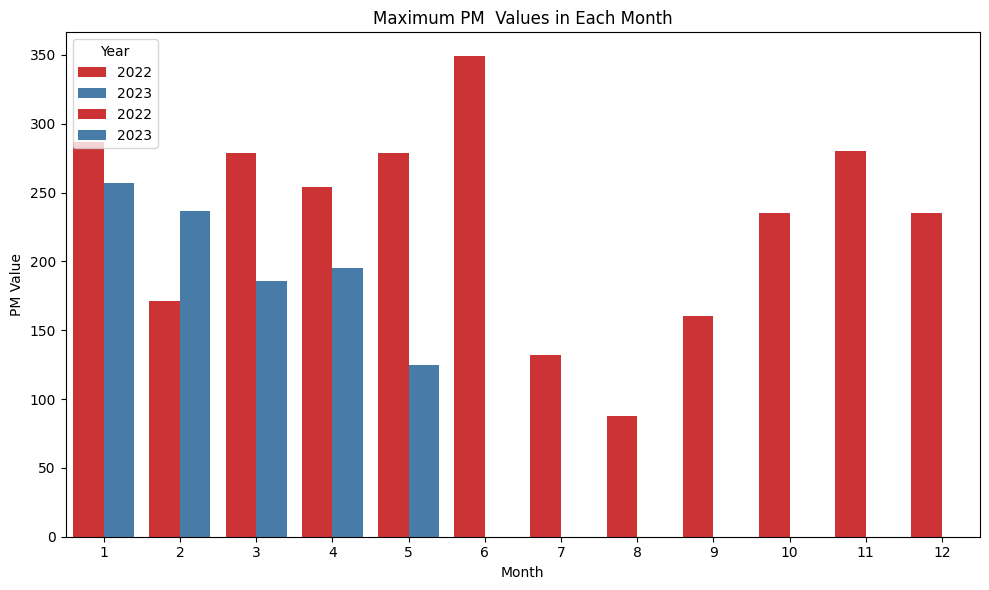

In [ ]:
new_df = merged_df.copy()
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Extract month and year from the 'Date' column
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year

# Group the data by month and year, and find the maximum PM2.5 and PM10 values
max_pm_values = new_df.groupby(['Year', 'Month'])[['Average PM2.5', 'Average PM10']].max()

# Reset index to make 'Year' and 'Month' columns accessible for plotting
max_pm_values = max_pm_values.reset_index()

# Visualize the maximum PM2.5 and PM10 values in each month
colors = sns.color_palette('Set1', n_colors=max_pm_values['Year'].nunique())

# Visualize the maximum PM2.5 and PM10 values in each month
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Month', y='Average PM2.5', hue='Year', data=max_pm_values, ax=ax, palette=colors)
sns.barplot(x='Month', y='Average PM10', hue='Year', data=max_pm_values, ax=ax, palette=colors)
ax.set_xlabel('Month')
ax.set_ylabel('PM Value')
ax.set_title('Maximum PM  Values in Each Month')
ax.legend(title='Year')
plt.tight_layout()
plt.show()

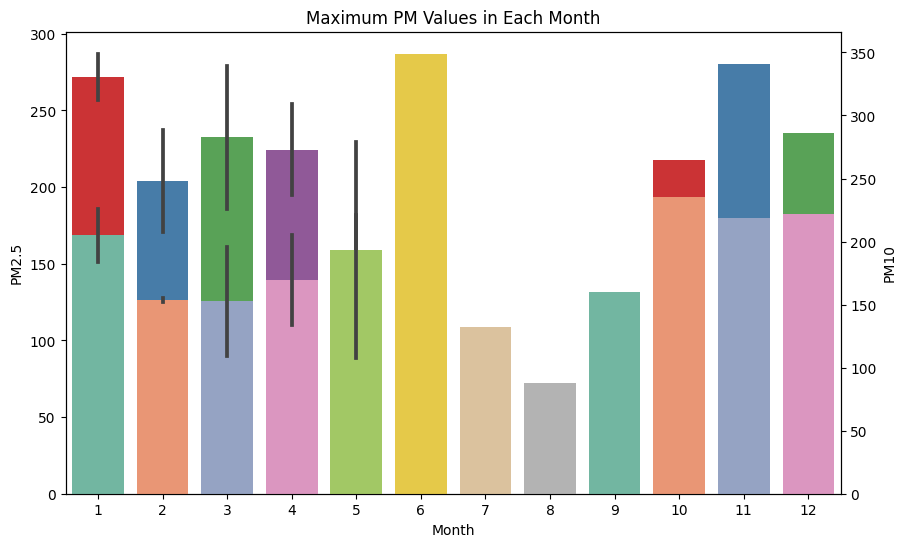

In [ ]:
new_df = merged_df.copy()
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Extract month and year from the 'Date' column
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year

# Group the data by month and year, and find the maximum PM2.5 and PM10 values
max_pm_values = new_df.groupby(['Year', 'Month'])[['Average PM2.5', 'Average PM10']].max()

# Reset index to make 'Year' and 'Month' columns accessible for plotting
max_pm_values = max_pm_values.reset_index()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the maximum PM2.5 values
sns.barplot(x='Month', y='Average PM2.5',  data=max_pm_values, ax=ax, palette='Set1')
ax.set_xlabel('Month')
ax.set_ylabel('PM2.5')
ax.set_title('Maximum PM Values in Each Month')

# Create a second set of axes for the PM10 values
ax2 = ax.twinx()
sns.barplot(x='Month', y='Average PM10',  data=max_pm_values, ax=ax2, palette='Set2')
ax2.set_ylabel('PM10')



plt.show()


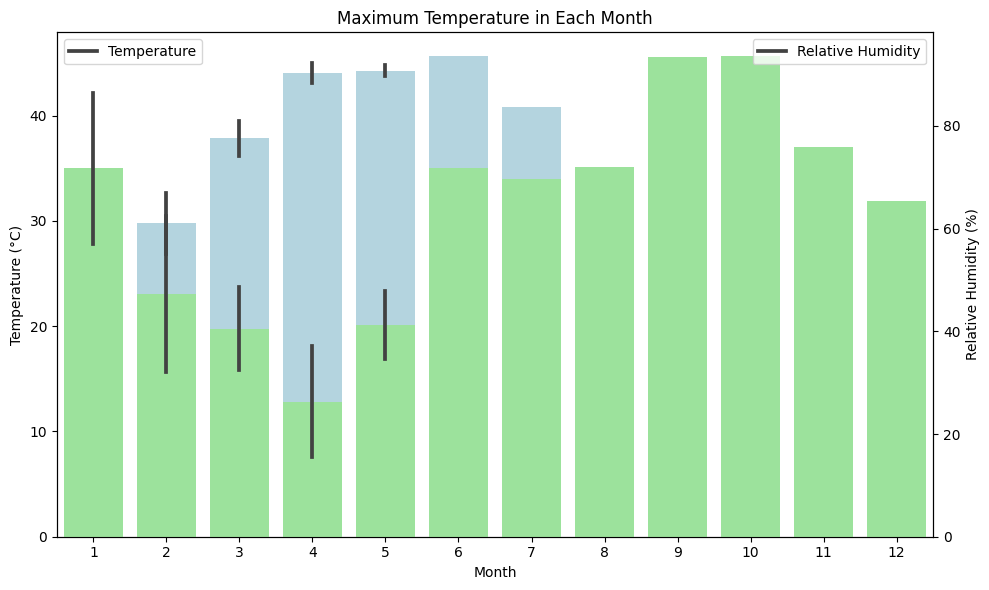

In [ ]:
new_df = merged_df.copy()
new_df['Date'] = pd.to_datetime(new_df['Date'])

# Extract month and year from the 'Date' column
new_df['Month'] = new_df['Date'].dt.month
new_df['Year'] = new_df['Date'].dt.year

# Group the data by month and year, and find the maximum temperature and relative humidity values
max_temp_rh_values = new_df.groupby(['Year', 'Month'])[['Temp', 'RH']].max()

# Reset index to make 'Year' and 'Month' columns accessible for plotting
max_temp_rh_values = max_temp_rh_values.reset_index()

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the maximum temperature values
sns.barplot(x='Month', y='Temp', data=max_temp_rh_values, ax=ax, color='lightblue')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Maximum Temperature in Each Month')

# Create a second set of axes for the relative humidity values
ax2 = ax.twinx()
sns.barplot(x='Month', y='RH', data=max_temp_rh_values, ax=ax2, color='lightgreen')
ax2.set_ylabel('Relative Humidity (%)')

# Adjust the legend and plot layout
ax.legend(['Temperature'], loc='upper left')
ax2.legend(['Relative Humidity'], loc='upper right')
plt.tight_layout()
plt.show()


<ipython-input-29-bcc150909e0d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= merged_df.corr()


<Axes: >

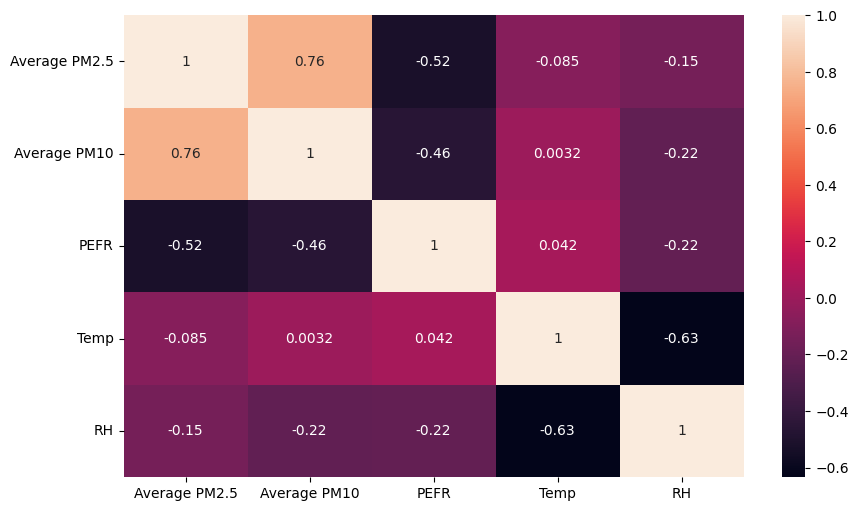

In [ ]:
correlation= merged_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

#Test-Train-Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = merged_df.copy()

In [ ]:
df = df.drop(['State', 'City','Place','Date'], axis=1)

In [ ]:
Y=df.pop('PEFR')

In [ ]:
Y.head(5)

0    312
1    300
2    250
3    244
4    230
Name: PEFR, dtype: int64

In [ ]:
X=df.copy()

In [ ]:
X.head()

,Average PM2.5,Average PM10,Temp,RH
0,130.0,36.0,18.11,56.38
1,157.0,48.0,16.85,56.81
2,213.0,61.0,14.34,69.56
3,232.0,81.0,18.47,62.12
4,252.0,162.0,18.99,51.88


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


# Build the ANN model
ANN_model = Sequential()
ANN_model.add(Dense(64, input_dim=4, activation='relu'))
ANN_model.add(Dense(64, activation='relu'))
ANN_model.add(Dense(1))

# Compile the model
ANN_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
ANN_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 90547.0000
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 90043.7031
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 89395.6797
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 88441.6562
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 87034.8984
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 85021.5234
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 82286.7500
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 78699.6797
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 74160.6875
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 68692.1406
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 62307.3203
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 

Evaluating the model

In [ ]:
ANN_loss = ANN_model.evaluate(X_test, y_test)
print(f'Test loss: {ANN_loss}')

4/4 [==============================] - 0s 4ms/step - loss: 1021.3606
Test loss: 1021.360595703125


Making Predictions

In [ ]:
new_data = np.array([[65, 25, 15, 20]])
new_data_scaled = scaler.transform(new_data)
prediction = ANN_model.predict(new_data_scaled)
print(f'PEFR prediction: {prediction}')

1/1 [==============================] - 0s 84ms/step
PEFR prediction: [[404.84113]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#DNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Build the DNN model
DNN_model = Sequential()
DNN_model.add(Dense(64, input_dim=4, activation='relu'))
DNN_model.add(Dense(128, activation='relu'))
DNN_model.add(Dense(128, activation='relu'))
DNN_model.add(Dense(1))

# Compile the model
DNN_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
DNN_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 90350.9062
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 88540.3281
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 83161.8125
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 70078.0781
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 45930.0742
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 18559.3203
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 9108.7510
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6816.7100
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 5266.9424
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 4643.2280
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 4227.7871
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 3865.

Evaluate the model

In [ ]:
DNN_loss = DNN_model.evaluate(X_test, y_test)
print(f'Test loss: {DNN_loss}')

4/4 [==============================] - 0s 3ms/step - loss: 641.4606
Test loss: 641.4605712890625


Making Predictions

In [ ]:
new_data = np.array([[65, 25, 15, 20]])
new_data_scaled = scaler.transform(new_data)
prediction = DNN_model.predict(new_data_scaled)
print(f'PEFR prediction: {prediction}')

1/1 [==============================] - 0s 63ms/step
PEFR prediction: [[406.50366]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#FCN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense

# Reshape the input data for FCN
X_train_1 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_1 = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the FCN model
FCN_model = Sequential()
FCN_model.add(Conv1D(64, 3, activation='relu', input_shape=(4, 1)))
FCN_model.add(Conv1D(64, 3, activation='relu',padding='same'))
FCN_model.add(Conv1D(64, 3, activation='relu', padding='same'))
FCN_model.add(GlobalAveragePooling1D())
FCN_model.add(Dense(64, activation='relu'))
FCN_model.add(Dense(1))

# Compile the model
FCN_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
FCN_model.fit(X_train_1, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 90569.7266
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 88759.6094
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 80546.2188
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 53737.4609
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 14536.0498
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 10361.9189
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 6213.3579
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 4823.9551
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 3987.5010
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 3524.1318
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 3187.1775
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 2928.

Evaluationg the model

In [ ]:
FCN_loss = FCN_model.evaluate(X_test_1, y_test)
print(f'Test loss: {FCN_loss}')

4/4 [==============================] - 0s 3ms/step - loss: 685.9621
Test loss: 685.9620971679688


Making Predictions

In [ ]:
new_data = np.array([[65, 25, 15, 20]])
new_data_scaled = scaler.transform(new_data)
new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))
prediction = FCN_model.predict(new_data_reshaped)
print(f'PEFR prediction: {prediction}')

1/1 [==============================] - 0s 97ms/step
PEFR prediction: [[388.60944]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense


# Reshape the input data for CNN
X_train_2 = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_2 = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


# Build the CNN model
CNN_model = Sequential()
CNN_model.add(Conv1D(64, 3, activation='relu', input_shape=(4, 1)))
CNN_model.add(MaxPooling1D(2))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(1))

# Compile the model
CNN_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
CNN_model.fit(X_train_2, y_train, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 90716.9531
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 90217.2031
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 89564.4609
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 88580.9766
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 87126.3984
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 84998.6719
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 81991.5781
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 78001.0078
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 72910.0938
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 66715.9688
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 59474.7461
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 

Evaluating the model

In [ ]:
CNN_loss = CNN_model.evaluate(X_test_2, y_test)
print(f'Test loss: {CNN_loss}')

4/4 [==============================] - 0s 4ms/step - loss: 1256.8923
Test loss: 1256.892333984375


Making Predictions

In [ ]:
new_data = np.array([[65, 25, 15, 20]])  # Replace with your own data
new_data_scaled = scaler.transform(new_data)
new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], new_data_scaled.shape[1], 1))
prediction = CNN_model.predict(new_data_reshaped)
print(f'PEFR prediction: {prediction}')

1/1 [==============================] - 0s 69ms/step
PEFR prediction: [[382.8435]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Evaluating Models

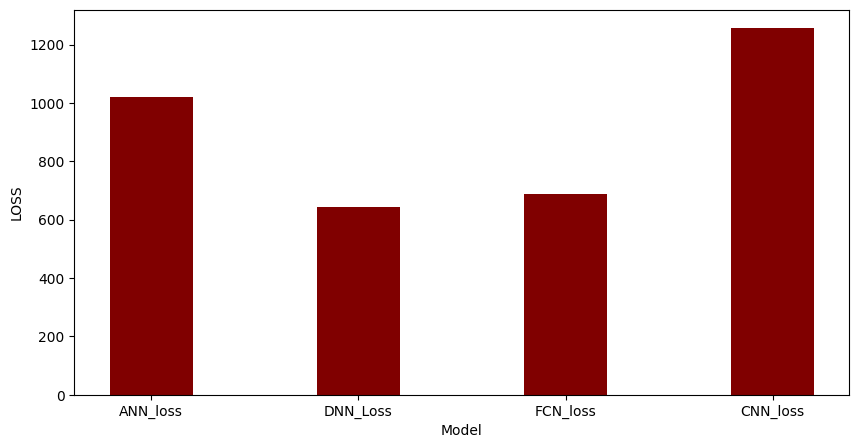

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'ANN_loss':ANN_loss, 'DNN_Loss':DNN_loss, 'FCN_loss':FCN_loss,
        'CNN_loss':CNN_loss}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)

plt.xlabel("Model")
plt.ylabel("LOSS")
plt.show()

###The lesser the loss the higher the accuracy

From the above insights we can say that DNN model has the least loss count than the other models.So, we choose DNN model for our Prediction

#Making Predictions

In [ ]:
def PEFR_Risk(pred_PEFR):
  print('Enter the Best PEFR:')
  PEFR_best = int(input())
  Peak_flow_variability= (PEFR_best / pred_PEFR) * 100
  if Peak_flow_variability > 80:
    print('SAFE')
  elif Peak_flow_variability < 50:
    print('RISK')
  else: print('MODERATE')


In [ ]:
new_data = np.array([[65, 25, 15, 20]])
new_data_scaled = scaler.transform(new_data)
prediction = DNN_model.predict(new_data_scaled)
PEFR_Risk(prediction)

1/1 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Enter the Best PEFR:
310
MODERATE
